In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tikzplotlib
import re

In [2]:
# style to sbn
plt.style.use('seaborn-v0_8')

In [3]:
def tikzplotlib_fix_ncols(obj):
    """
    workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
    """
    if hasattr(obj, "_ncols"):
        obj._ncol = obj._ncols
    for child in obj.get_children():
        tikzplotlib_fix_ncols(child)

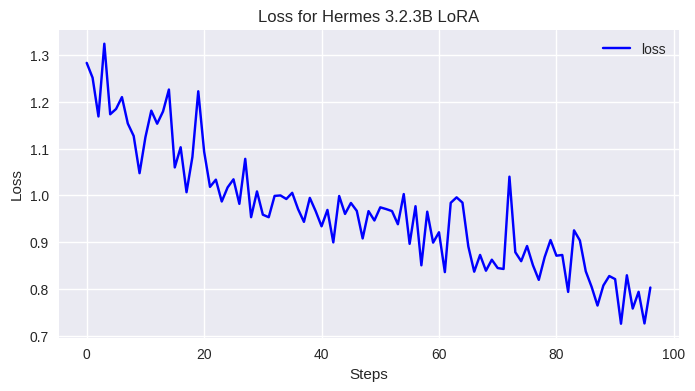

In [4]:
def plot_learning(
    log_file: str="../finetunes/hermes-3-2-3B-lora/logs/log_1741950098.txt",
    target_f: str = "loss_plot.tex",
    title: str = "Loss for Hermes 3.2.3B LoRA",
):
    loss_data = ""
    with open(log_file) as f:
        loss_data = f.readlines()
    loss_items = [re.findall(r"loss:(\d+\.\d+)", x) for x in loss_data]
    loss_items = [float(x[0]) for x in loss_items if len(x) > 0]
    loss_items
    fig = plt.figure(figsize=(8, 4))
    ax = fig.add_subplot(111)
    ax.plot(loss_items, label="loss", color="blue")
    ax.set_xlabel("Steps")
    ax.set_ylabel("Loss")
    ax.set_title(title)
    ax.legend()

    tikzplotlib_fix_ncols(fig)
    tikzplotlib.save(
        target_f,
        figure=fig,
        axis_width="0.8\\linewidth",
        axis_height="0.4\\linewidth",
        # extra_axis_parameters={
        #     "legend style": r"legend pos=outer north east",
        #     "legend columns": 1,
        #     "legend cell align": "left",
        #     "legend to name": "loss_legend",
        #     "legend entries": ["loss"],
        # },
    )
plot_learning()

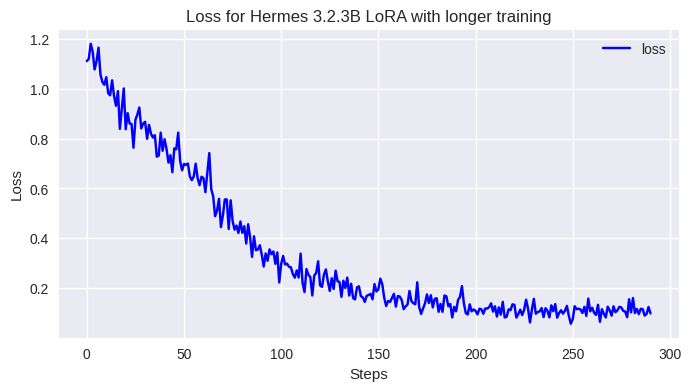

In [6]:
plot_learning(
    "../finetunes/hermes-3-2-3B-lora-long/logs/log_1747565688.txt",
    "loss_plot_long.tex",
    title="Loss for Hermes 3.2.3B LoRA with longer training",
)